### Analytics on Bank Generated Data (with analysis on specific problem statments requried by bank).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
%matplotlib inline
pd.options.display.max_rows = 5413

In [2]:
X=pd.read_csv('database.csv')
X.shape

(5413, 20)

In [3]:
X.head(3)

,Institution Name,Main Office,Branch Name,Branch Number,Established Date,Acquired Date,Street Address,City,County,State,Zipcode,Latitude,Longitude,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits,2016 Deposits
0,JPMorgan Chase Bank,1,JPMorgan Chase Bank Main Office,0,01/01/1824,NaN,1111 Polaris Parkway,Columbus,Delaware,OH,43240,40.14453,-82.99115,633131000.0,743268000.0,832455000.0,916543000.0,1.032549e+09,1.069425e+09,1155185000
1,JPMorgan Chase Bank,0,Vernon Hills Scarsdale Branch,2,03/20/1961,NaN,676 White Plains Road,Scarsdale,Westchester,NY,10583,40.97008,-73.80670,293229.0,310791.0,325742.0,327930.0,3.277920e+05,3.414750e+05,381558
2,JPMorgan Chase Bank,0,Great Neck Northern Boulevard Branch,3,09/09/1963,NaN,410 Northern Boulevard,Great Neck,Nassau,NY,11021,40.77944,-73.72240,191011.0,206933.0,216439.0,237983.0,2.341830e+05,2.624550e+05,278940


In [4]:
X.tail(3)

,Institution Name,Main Office,Branch Name,Branch Number,Established Date,Acquired Date,Street Address,City,County,State,Zipcode,Latitude,Longitude,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits,2016 Deposits
5410,JPMorgan Chase Bank,0,Los Olivos Branch,7984,03/15/2016,NaN,8593 Irvine Center Drive,Irvine,Orange,CA,92618,33.64412,-117.74453,NaN,NaN,NaN,NaN,NaN,NaN,6689
5411,JPMorgan Chase Bank,0,Lake Forest Branch,7988,01/01/2016,NaN,5660 Read Blvd,New Orleans,Orleans,LA,70127,30.03205,-89.97260,NaN,NaN,NaN,NaN,NaN,NaN,94133
5412,JPMorgan Chase Bank,0,Buffalo-Mm Branch,7989,01/01/2016,NaN,350 Main Street,Buffalo,Erie,NY,14202,42.88429,-78.87487,NaN,NaN,NaN,NaN,NaN,NaN,45596


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5413 entries, 0 to 5412
Data columns (total 20 columns):
Institution Name    5413 non-null object
Main Office         5413 non-null int64
Branch Name         5413 non-null object
Branch Number       5413 non-null int64
Established Date    5413 non-null object
Acquired Date       3798 non-null object
Street Address      5413 non-null object
City                5413 non-null object
County              5413 non-null object
State               5413 non-null object
Zipcode             5413 non-null int64
Latitude            5347 non-null float64
Longitude           5347 non-null float64
2010 Deposits       4673 non-null float64
2011 Deposits       4835 non-null float64
2012 Deposits       5084 non-null float64
2013 Deposits       5238 non-null float64
2014 Deposits       5357 non-null float64
2015 Deposits       5394 non-null float64
2016 Deposits       5413 non-null int64
dtypes: float64(8), int64(4), object(8)
memory usage: 845.9+ KB


In [6]:
X.isnull().sum()

Institution Name       0
Main Office            0
Branch Name            0
Branch Number          0
Established Date       0
Acquired Date       1615
Street Address         0
City                   0
County                 0
State                  0
Zipcode                0
Latitude              66
Longitude             66
2010 Deposits        740
2011 Deposits        578
2012 Deposits        329
2013 Deposits        175
2014 Deposits         56
2015 Deposits         19
2016 Deposits          0
dtype: int64

### Problem Statments:

Perform Exploratory Data Analysis on the dataset to understand the following:
1. Where did Chase Bank customers deposit the most money in 2015?
2. Which bank branch has seen the most growth in deposits over the years?
3. Illustrate the acquisitions by bank state wise
4. What city has the most bank branches?
5. How did the bank deposits grow between the years 2010-2016 for the top five
bank
branches in New York(NY) state

### 1.  Chase Bank customers most deposits the in 2015:

In [10]:
X['Branch Name'].nunique()

5317

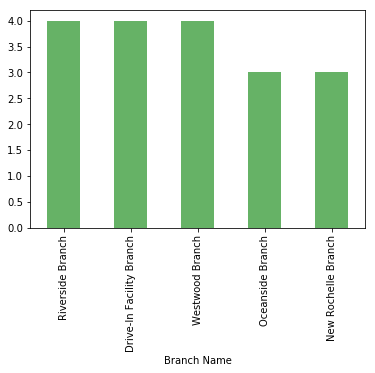

In [70]:
X['2015 Deposits'].groupby(X['Branch Name']).count().sort_values(ascending=False).head().plot(kind='bar',color='g',alpha=0.6)
plt.show()

In [55]:
X['2015 Deposits'].groupby(X['Branch Name']).count().sort_values(ascending=False).head()

Branch Name
Riverside Branch            4
Drive-In Facility Branch    4
Westwood Branch             4
Oceanside Branch            3
New Rochelle Branch         3
Name: 2015 Deposits, dtype: int64

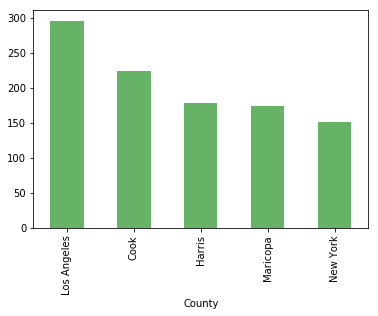

In [72]:
X['2015 Deposits'].groupby(X['County']).count().sort_values(ascending=False).head().plot(kind='bar',color='g',alpha=0.6)
plt.show()

In [56]:
X['2015 Deposits'].groupby(X['County']).count().sort_values(ascending=False).head()

County
Los Angeles    296
Cook           224
Harris         179
Maricopa       174
New York       152
Name: 2015 Deposits, dtype: int64

* Most amount of Customers Deposites were in Riverside Branch in country los angeles for the year 2015. 

#### Max Amount of money Deposited in 2015:

In [13]:
X['2015 Deposits'].groupby(X['Branch Name']).sum().sort_values(ascending=False).head()

Branch Name
JPMorgan Chase Bank Main Office    1.069425e+09
Madison and 48th St Branch         2.612928e+08
Madison Ave Abd 48th St Branch     8.456904e+07
Houston Main Office                6.070217e+07
Chicago's Main Office Branch       4.332695e+07
Name: 2015 Deposits, dtype: float64

In [14]:
X['2015 Deposits'].groupby(X['County']).sum().sort_values(ascending=False).head()

County
Delaware    1.070431e+09
New York    4.047430e+08
Harris      7.961658e+07
Cook        6.996147e+07
Dallas      3.680343e+07
Name: 2015 Deposits, dtype: float64

* Max amount of Customers money Deposites were in JPmorgan Branch in country of Delaware for the year 2015. 

### 2. Which bank branch has seen the most growth in deposits over the years?

In [11]:

list=['2010 Deposits','2011 Deposits', '2012 Deposits', '2013 Deposits', '2014 Deposits',
       '2015 Deposits', '2016 Deposits']


for i in list:
    print(X[i].groupby(X['Branch Name']).sum().sort_values(ascending=False).head(1))
    print('')
    print('')

Branch Name
JPMorgan Chase Bank Main Office    633131000.0
Name: 2010 Deposits, dtype: float64


Branch Name
JPMorgan Chase Bank Main Office    743268000.0
Name: 2011 Deposits, dtype: float64


Branch Name
JPMorgan Chase Bank Main Office    832455000.0
Name: 2012 Deposits, dtype: float64


Branch Name
JPMorgan Chase Bank Main Office    916543000.0
Name: 2013 Deposits, dtype: float64


Branch Name
JPMorgan Chase Bank Main Office    1.032549e+09
Name: 2014 Deposits, dtype: float64


Branch Name
JPMorgan Chase Bank Main Office    1.069425e+09
Name: 2015 Deposits, dtype: float64


Branch Name
JPMorgan Chase Bank Main Office    1155185000
Name: 2016 Deposits, dtype: int64




* From the Analysis we can Observe that Jpmorgan Main office Branch had most Growth over the years.

### 3. Illustrate the acquisitions by bank state wise:

In [22]:
X['State'].nunique()

26

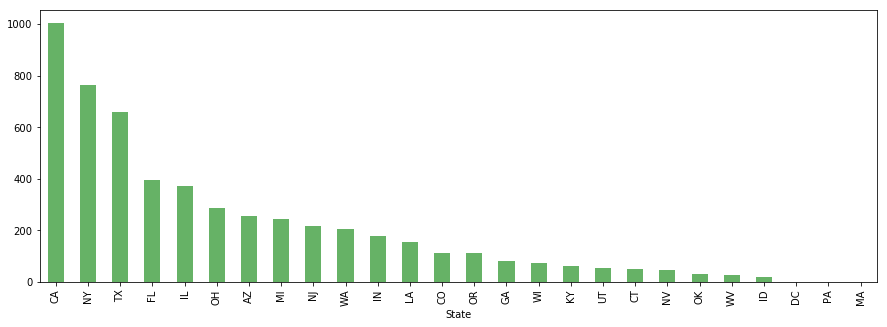

In [69]:
plt.figure(figsize=(15,5))
X['Branch Name'].groupby(X['State']).count().sort_values(ascending=False).plot(kind='bar',color='g',alpha=0.6)
plt.show()

* From the analysis we can observe that State CA has most number of  Bank acquisitions

### 4. What city has the most bank branches?

In [33]:
X['Branch Name'].groupby(X['City']).count().sort_values(ascending=False).head()

City
New York City    154
Houston          139
Chicago          119
Brooklyn          77
Dallas            64
Name: Branch Name, dtype: int64

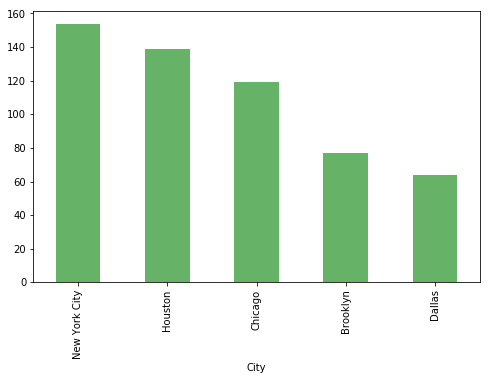

In [68]:
plt.figure(figsize=(8,5))
X['Branch Name'].groupby(X['City']).count().sort_values(ascending=False).head().plot(kind='bar',color='g',alpha=0.6)
plt.show()

* From the analysis we can see that New York city had most amount of Banks.

### 5. How did the bank deposits grow between the years 2010-2016 for the top five bank branches in New York(NY) state

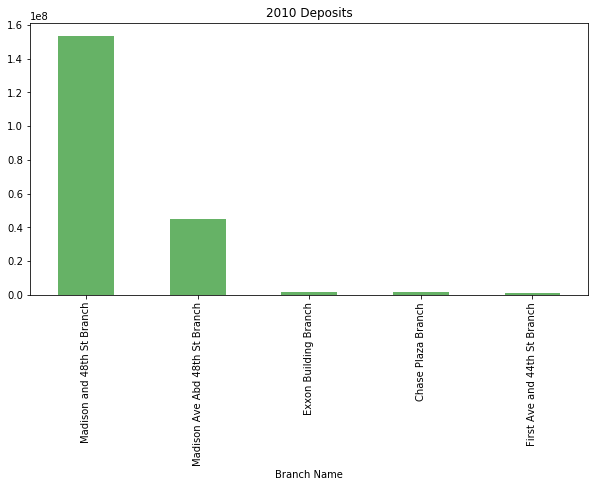


2010 Deposits Distribution
Branch Name
Madison and 48th St Branch        153577328.0
Madison Ave Abd 48th St Branch     45099076.0
Exxon Building Branch               1633290.0
Chase Plaza Branch                  1393004.0
First Ave and 44th St Branch        1049068.0
Name: 2010 Deposits, dtype: float64
_______________________________________________________________________________________


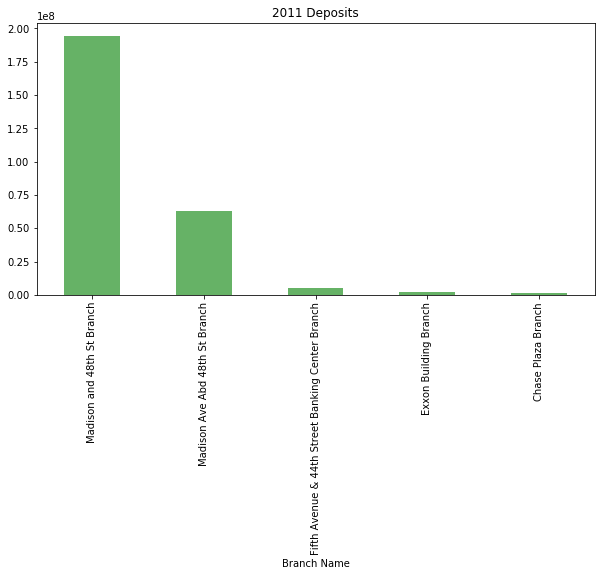


2011 Deposits Distribution
Branch Name
Madison and 48th St Branch                          194388000.0
Madison Ave Abd 48th St Branch                       62630984.0
Fifth Avenue & 44th Street Banking Center Branch      4792944.0
Exxon Building Branch                                 1755963.0
Chase Plaza Branch                                    1475539.0
Name: 2011 Deposits, dtype: float64
_______________________________________________________________________________________


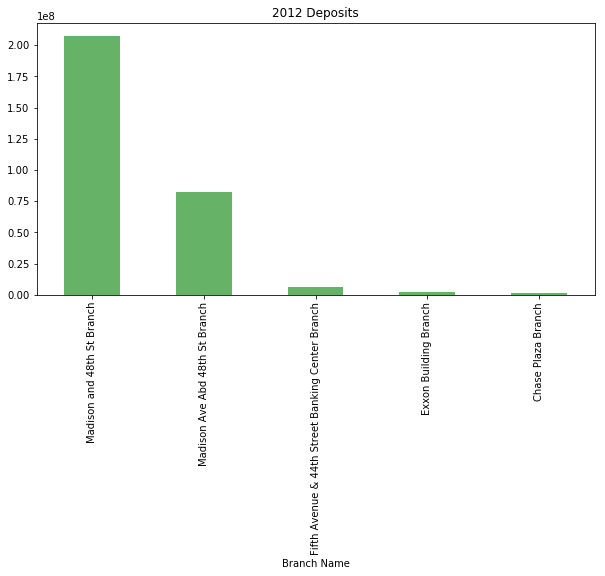


2012 Deposits Distribution
Branch Name
Madison and 48th St Branch                          207367988.0
Madison Ave Abd 48th St Branch                       81960379.0
Fifth Avenue & 44th Street Banking Center Branch      6278005.0
Exxon Building Branch                                 1915696.0
Chase Plaza Branch                                    1517297.0
Name: 2012 Deposits, dtype: float64
_______________________________________________________________________________________


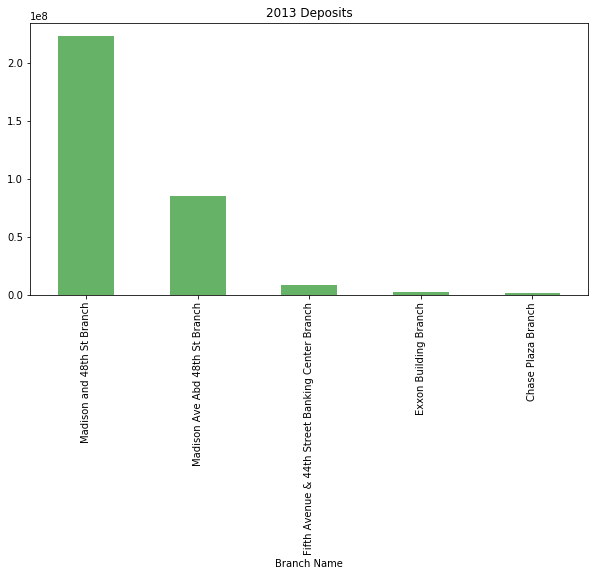


2013 Deposits Distribution
Branch Name
Madison and 48th St Branch                          223395353.0
Madison Ave Abd 48th St Branch                       85177807.0
Fifth Avenue & 44th Street Banking Center Branch      8334885.0
Exxon Building Branch                                 1999711.0
Chase Plaza Branch                                    1637099.0
Name: 2013 Deposits, dtype: float64
_______________________________________________________________________________________


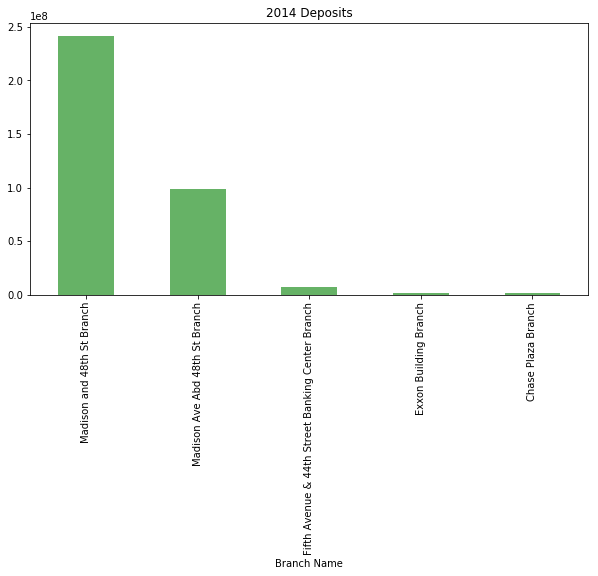


2014 Deposits Distribution
Branch Name
Madison and 48th St Branch                          241540582.0
Madison Ave Abd 48th St Branch                       98322162.0
Fifth Avenue & 44th Street Banking Center Branch      6822099.0
Exxon Building Branch                                 2004986.0
Chase Plaza Branch                                    1656725.0
Name: 2014 Deposits, dtype: float64
_______________________________________________________________________________________


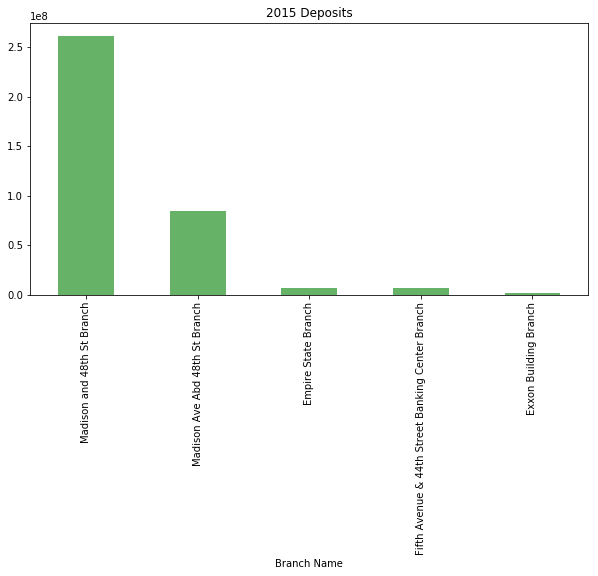


2015 Deposits Distribution
Branch Name
Madison and 48th St Branch                          261292750.0
Madison Ave Abd 48th St Branch                       84569038.0
Empire State Branch                                   7099781.0
Fifth Avenue & 44th Street Banking Center Branch      6675447.0
Exxon Building Branch                                 2008347.0
Name: 2015 Deposits, dtype: float64
_______________________________________________________________________________________


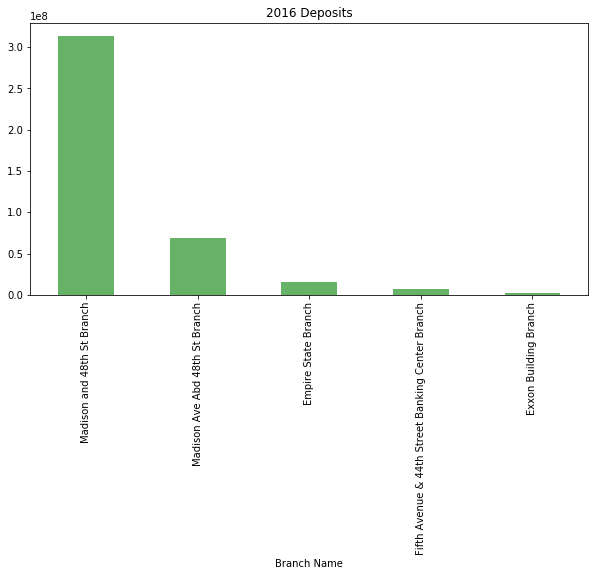


2016 Deposits Distribution
Branch Name
Madison and 48th St Branch                          313686851
Madison Ave Abd 48th St Branch                       69044786
Empire State Branch                                  15580897
Fifth Avenue & 44th Street Banking Center Branch      6879927
Exxon Building Branch                                 2072137
Name: 2016 Deposits, dtype: int64
_______________________________________________________________________________________


In [12]:
for i in list:
    plt.figure(figsize=(10,5))
    X[X['State']=='NY'][i].groupby(X[X['State']=='NY']['Branch Name']).sum().sort_values(ascending=False).head(5).plot(kind='bar',color='g',alpha=0.6)
    plt.title(i)
    plt.show()
    print('')
    print(i,'Distribution')
    print(X[X['State']=='NY'][i].groupby(X[X['State']=='NY']['Branch Name']).sum().sort_values(ascending=False).head(5))
    print('_______________________________________________________________________________________')

We can observe that Madison and 48th St Branch Deposites has increased consistently over the years.
* 2010: 153577328.0
* 2011: 194388000.0
* 2012: 207367988.0
* 2013: 223395353.0
* 2014: 241540582.0
* 2015: 261292750.0
* 2016: 313686851

## Report:

1. Where did Chase Bank customers deposit the most money in 2015?
  * Most amount of Customers Deposites were in Riverside Branch in country losangeles for the year 2015.
  * Max amount of Customers money Deposites were in JPmorgan Branch in country of Delaware for the year 2015.  

 
2. Which bank branch has seen the most growth in deposits over the years?
  * From the Analysis we can Observe that Jpmorgan Main office Branch had most Growth over the years.


3. Illustrate the acquisitions by bank state wise
  * From the analysis we can observe that State CA has most number of  Bank acquisitions


4. What city has the most bank branches?
   * From the analysis we can see that New York city had most amount of Banks. 


5. How did the bank deposits grow between the years 2010-2016 for the top five bank branches in New York(NY) state
   * We can observe that Madison and 48th St Branch Deposites has increased consistently over the years.
    * 2010: 153577328.0
    * 2011: 194388000.0
    * 2012: 207367988.0
    * 2013: 223395353.0
    * 2014: 241540582.0
    * 2015: 261292750.0
    * 2016: 313686851